## Imports

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons

## Definindo DataSet

In [430]:
X, y = make_moons(n_samples=500)# load_iris()
# df = pd.DataFrame(data=data_set.data, columns=data_set.feature_names)
# df.head()

In [431]:
# X, y = data_set['data'], data_set['target']
X.shape, y.shape, np.unique(y, return_counts=True)

((500, 2), (500,), (array([0, 1]), array([250, 250])))

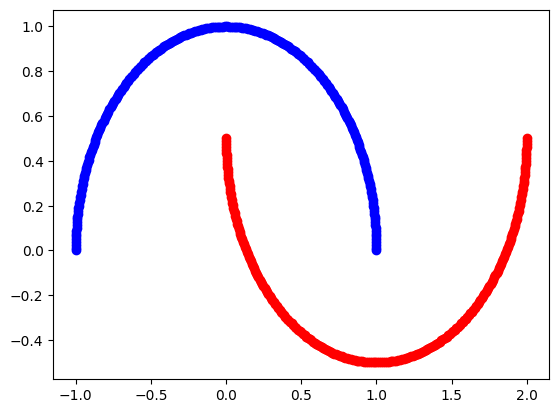

In [432]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], color='blue')
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red')

# Multilayer perceptron

In [433]:
class MLP():
    def __init__(self, X:np.ndarray, y:np.ndarray, hidden_neurons:int, output_neurons:int) -> None:
        self.X = X
        self.y = y

        self.input_neurons = X.shape[1]
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons

        # camada inicial para camada oculta
        self.z1 = None
        self.f1 = None
        self.w1 = np.random.randn(self.input_neurons, self.hidden_neurons) / np.sqrt(self.input_neurons)
        self.b1 = np.zeros((1, self.hidden_neurons)) # bias

        # camada oculta para saida
        self.f2 = None
        self.w2 = np.random.randn(self.hidden_neurons, self.output_neurons) / np.sqrt(self.input_neurons)
        self.b2 = np.zeros((1, self.output_neurons))

    def predict(self):
        pass

    def fit(self, ephocs:int, learning_rate:float) -> None:
        """Realiza o treinamento da rede."""
        for e in range(ephocs):
            output = self.__feedfoward(self.X)
            loss = self.__loss_function(output)

            # Condição de parada
            accuracy = self.__calc_accuracy(output)
            if accuracy == 1:
                print(f'100% de acurácia após {e} épocas. Treinamento concluído.')
                break
            else:
                print(f'Época: {e} \t Acertos: {accuracy} \t Perda: {loss}')

            self.__backpropagation(output, learning_rate)

    def __feedfoward(self, X:np.ndarray) -> np.ndarray:
        """Realiza a propagação direta pela rede neural."""
        self.z1 = (X @ self.w1) + self.b1 # broadcasting
        self.f1 = self.__activation_function(self.z1, layer='hidden')
        
        z2 = (self.f1 @ self.w2) + self.b2
        self.f2 = self.__activation_function(z2, layer='output')

        return self.f2

    def __activation_function(self,input:np.ndarray, layer:str) -> np.ndarray:
        """Aplica a função de ativação à saída da camada especificada.:
            Valores possíveis:
                - 'hidden': Camada oculta, usa a função tangente hiperbólica.
                - 'output': Camada de saída, usa a função softmax.
        """
        if layer == 'hidden':
            return np.tanh(input)
        elif layer == 'output':
            exp_values = np.exp(input)
            return exp_values / np.sum(exp_values, axis=1, keepdims=True)
        else:
            raise ValueError("O argumento 'layer' deve ser 'hidden' ou 'output'.")
    
    def __loss_function(self, predictions: np.ndarray) -> float:
        """Calcula a perda da rede neural usando a Cross-Entropy Categórica."""
        # Probabilidades preditas para as classes verdadeiras
        predicted_probabilities = predictions[np.arange(len(predictions)), self.y]
        loss = -np.log(predicted_probabilities).mean()
        return loss

    def __backpropagation(self, predictions:np.ndarray, learning_rate:float) -> None:
        """Executa o algoritmo de backpropagation para atualizar os pesos."""
        # Calcula o gradiente da perda em relação à saída
        grad_loss_output = np.copy(predictions)
        true_labels = np.eye(grad_loss_output.shape[1])[y]  # one-hot encoding dos rótulos verdadeiros
        grad_loss_output -= true_labels
        
        # Gradientes da camada de saída
        grad_w2 = self.f1.T @ grad_loss_output
        grad_b2 = np.sum(grad_loss_output, axis=0, keepdims=True)

        # Calcula o gradiente da perda em relação à entrada da camada oculta
        grad_loss_hidden = (grad_loss_output @ self.w2.T) * (1 - np.power(self.f1, 2))
        
        # Gradientes da camada oculta
        grad_w1 = self.X.T @ grad_loss_hidden
        grad_b1 = np.sum(grad_loss_hidden, axis=0, keepdims=True)

        # Atualiza os pesos e bias das respectivas camadas
        self.w2 += - learning_rate * grad_w2
        self.b2 += - learning_rate * grad_b2
        self.w1 += - learning_rate * grad_w1
        self.b1 += - learning_rate * grad_b1

    def __calc_accuracy(self, predictions:np.ndarray) -> float:
        """Calcula a porcentagem de acertos do modelo."""
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = (predicted_labels == self.y).sum()
        accuracy = true_labels / self.X.shape[0]
        return np.round(accuracy, 3)

## Testes

In [434]:
model = MLP(X, y, 250, 2)
model.fit(50, 0.001)

Época: 0 	 Acertos: 0.71 	 Perda: 1.4445962563829502
Época: 1 	 Acertos: 0.5 	 Perda: 7.424915194492017
Época: 2 	 Acertos: 0.802 	 Perda: 4.276557809702432
Época: 3 	 Acertos: 0.854 	 Perda: 1.4757228413735093
Época: 4 	 Acertos: 0.884 	 Perda: 0.8883091019651332
Época: 5 	 Acertos: 0.894 	 Perda: 0.5867667555061519
Época: 6 	 Acertos: 0.888 	 Perda: 0.44555976246170687
Época: 7 	 Acertos: 0.89 	 Perda: 0.38826996304641875
Época: 8 	 Acertos: 0.89 	 Perda: 0.3517715055570947
Época: 9 	 Acertos: 0.9 	 Perda: 0.3186693496547426
Época: 10 	 Acertos: 0.896 	 Perda: 0.28865915049633356
Época: 11 	 Acertos: 0.916 	 Perda: 0.2632969994060418
Época: 12 	 Acertos: 0.898 	 Perda: 0.24390661205769862
Época: 13 	 Acertos: 0.93 	 Perda: 0.24044217566741186
Época: 14 	 Acertos: 0.894 	 Perda: 0.24024011194027864
Época: 15 	 Acertos: 0.926 	 Perda: 0.30060315873565
Época: 16 	 Acertos: 0.898 	 Perda: 0.23274447557378083
Época: 17 	 Acertos: 0.926 	 Perda: 0.3231185245858573
Época: 18 	 Acertos: 0.90